# Notebook to visualize graph latent space

In [7]:
import sys,os,pandas
import numpy as np
sys.path.append(os.path.expanduser('../../src/ml'))
# sys.path.append(os.path.expanduser('..'))

from load_matrix import load_df, _load_filtered_entities

In [8]:
version='v2.11'
norm_type='minmax'

## 1. All node classes embeddings

Projection of node embeddings colored by their class

### model definition

`ComplEx` and `RGCN` for now

In [9]:
model='ComplEx'

In [33]:
df=_load_filtered_entities(model,version,'')
df['class']=df['node_id'].apply(lambda x: x.split('_')[0])

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/notebooks/viz/../../models/executions/GSE54514_enriched_ontology_degfilterv2.10/outputmodel_ComplEx_entity_embeddings.npy, splitting real+imag.


In [11]:
df.iloc[:,5:df.shape[1]-1]

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199
0,-3.837191,-0.614155,1.499356,-4.311685,-5.370530,1.221993,11.512136,2.893684,-20.007824,-13.061667,...,-5.345125,3.718016,-3.496841,3.115153,2.593753,-0.836372,-3.021516,3.708978,8.019621,0.610315
1,-5.070963,-0.254380,-1.109585,6.089280,3.406363,2.391310,0.107864,-4.259182,-11.416837,-2.631203,...,-1.973810,-5.607207,6.456459,-3.326375,0.207856,1.447785,2.232963,-0.208907,-6.800537,4.295553
2,-3.672044,5.142236,-0.686417,2.699080,4.063172,-1.518527,-1.608591,5.004957,-13.032231,8.559210,...,4.059080,2.474560,3.099409,3.124347,-7.886050,-0.417701,3.555441,0.418716,-4.254946,-11.632294
3,1.256520,-1.635126,-0.291352,0.016303,-1.542102,1.469316,1.279222,1.698803,-12.265176,-0.218552,...,2.940727,1.640933,2.715072,-1.683907,-2.174782,1.576797,3.359914,1.522987,-3.357687,3.539298
4,1.016957,2.038682,1.844460,-1.650478,0.691949,0.340404,1.140677,-0.005729,-3.537621,3.741560,...,-0.053810,4.530461,1.703016,-0.124760,-0.791561,2.001722,4.360128,-0.910792,1.300700,-2.268037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636
18266,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636
18267,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636
18268,0.291708,-0.006770,1.432140,-0.184320,2.135234,-0.232475,1.880197,-0.231125,-1.674513,0.115315,...,-0.119581,-1.171638,1.130930,0.607569,-0.160598,1.653878,0.188031,2.638073,-0.959536,-0.634636


In [12]:
# -- umap of all embeddings colored by class

import umap
import matplotlib.pyplot as plt
import seaborn as sns
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(df.iloc[:,5:df.shape[1]-1].values)

# -- pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_pca = pca_result

# -- tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40)
tsne_result = tsne.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_tsne = tsne_result


2026-01-17 02:25:45.372989: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-17 02:25:46.811450: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-17 02:25:51.591241: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [13]:
colors={
    'GO': 'red',
    'Pathway': 'blue',
    'PatientSample': 'green',
    'Protein': 'orange',
    'Reaction': 'purple',
    'Sample': 'brown'
}


### umap

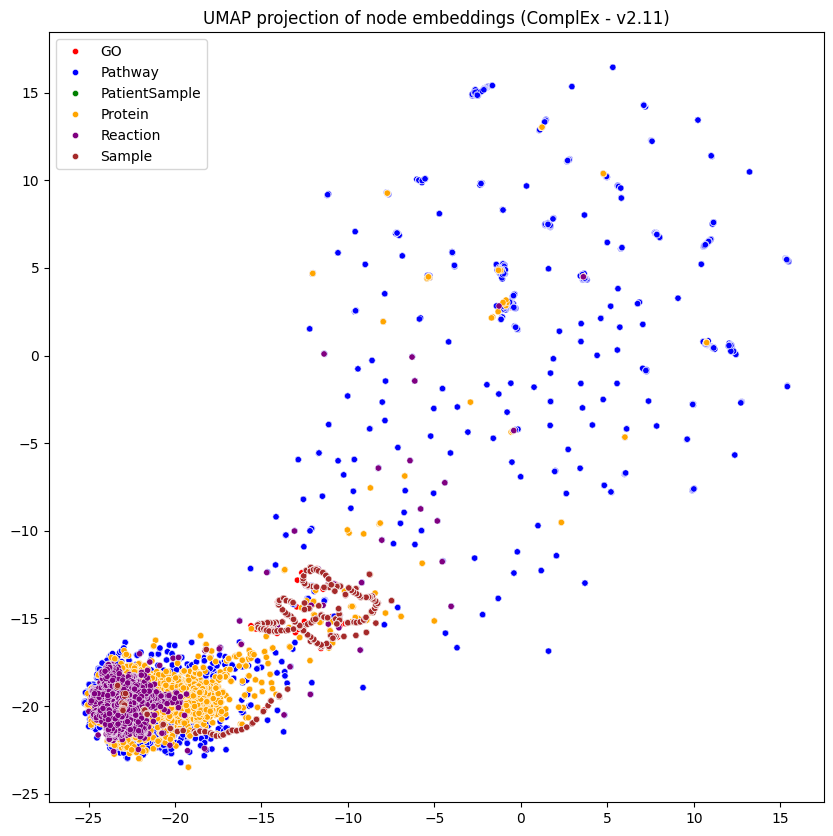

In [14]:

plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_umap[:,0], y=embedding_umap[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'UMAP projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()

### pca

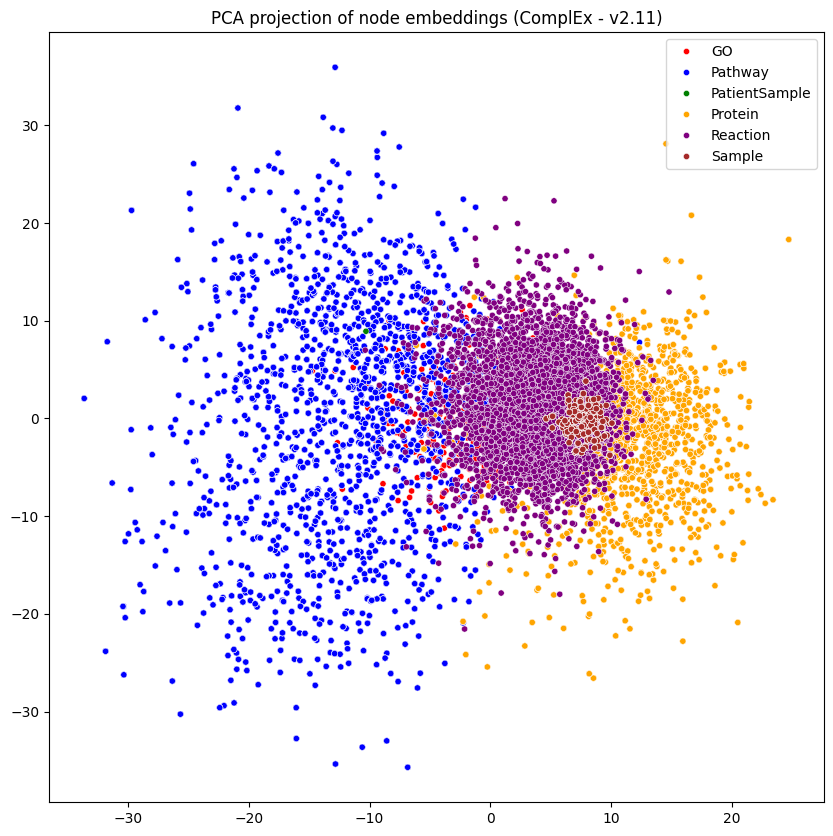

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'PCA projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()  

### tsne

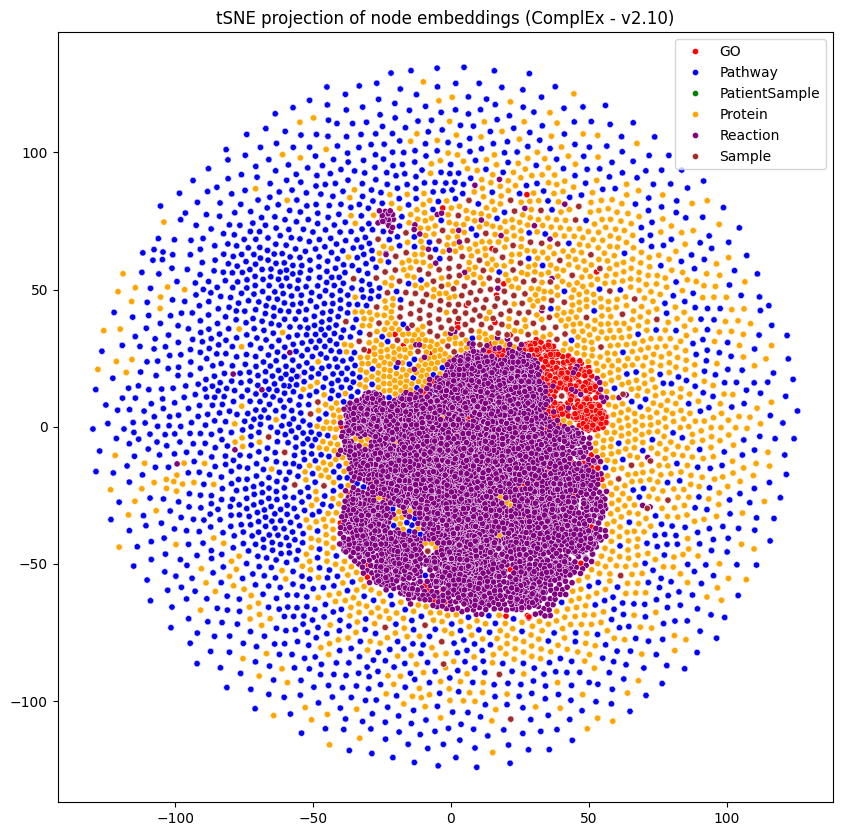

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'tSNE projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()

## 2. proteins node embeddings

In [36]:
model='ComplEx'
version='v2.11'

In [37]:
df=_load_filtered_entities(model,version,'Protein')
df.iloc[:,5:df.shape[1]-1]

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/notebooks/viz/../../models/executions/GSE54514_enriched_ontology_degfilterv2.11/outputmodel_ComplEx_entity_embeddings.npy, splitting real+imag.


,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_189,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198
7224,3.599671,-3.813769,0.044181,2.474854,-1.109317,1.586541,8.070227,-0.164765,1.699309,1.138031,...,0.446619,-3.024490,1.089458,1.841494,0.609983,10.709107,-2.566357,-0.322262,0.197641,0.505663
7225,-0.097077,0.817631,-8.057794,-1.099363,1.444472,2.153001,-5.765573,4.885435,-17.904093,5.762872,...,-6.821127,-7.772993,-2.238330,0.100747,6.716395,-9.914966,-1.535634,-4.480566,-1.636414,4.040620
7226,-0.097077,0.817631,-8.057794,-1.099363,1.444472,2.153001,-5.765573,4.885435,-17.904093,5.762872,...,-6.821127,-7.772993,-2.238330,0.100747,6.716395,-9.914966,-1.535634,-4.480566,-1.636414,4.040620
7227,-0.097077,0.817631,-8.057794,-1.099363,1.444472,2.153001,-5.765573,4.885435,-17.904093,5.762872,...,-6.821127,-7.772993,-2.238330,0.100747,6.716395,-9.914966,-1.535634,-4.480566,-1.636414,4.040620
7228,-9.248707,-11.257935,-0.038895,2.394689,-2.049648,6.937524,13.902204,6.594397,-21.494747,7.945406,...,-4.236675,5.765055,-9.406092,-4.332281,7.763097,1.336589,-9.337223,-2.919291,-6.859264,6.519964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,3.415856,3.156699,-1.787664,-2.025253,-1.651314,2.226924,-4.103724,0.359708,-12.587881,0.600800,...,-3.794670,0.984777,2.625717,-2.405212,1.259729,6.174298,-3.016648,-0.633309,-2.335617,3.315312
11087,3.415856,3.156699,-1.787664,-2.025253,-1.651314,2.226924,-4.103724,0.359708,-12.587881,0.600800,...,-3.794670,0.984777,2.625717,-2.405212,1.259729,6.174298,-3.016648,-0.633309,-2.335617,3.315312
11088,-0.240265,0.100752,0.587236,-2.159051,-4.364705,-1.391036,-0.360406,-2.324735,-10.631687,0.364636,...,1.134916,-0.885052,-4.719121,-0.538323,-4.532728,-3.172831,-8.836278,-2.138065,-2.640270,0.429531
11089,-0.240265,0.100752,0.587236,-2.159051,-4.364705,-1.391036,-0.360406,-2.324735,-10.631687,0.364636,...,1.134916,-0.885052,-4.719121,-0.538323,-4.532728,-3.172831,-8.836278,-2.138065,-2.640270,0.429531


In [40]:
# -- checking for structure, might want to colo through converging scale for interpretability (embedding loadings)


import umap
import matplotlib.pyplot as plt
import seaborn as sns
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(df.iloc[:,5:df.shape[1]-1].values)

# -- pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_pca = pca_result

# -- tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40)
tsne_result = tsne.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_tsne = tsne_result

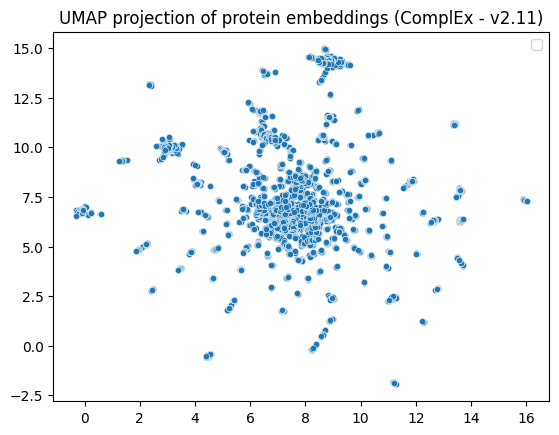

In [39]:
sns.scatterplot(x=embedding_umap[:,0], y=embedding_umap[:,1],  s=20)
plt.title(f'UMAP projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()

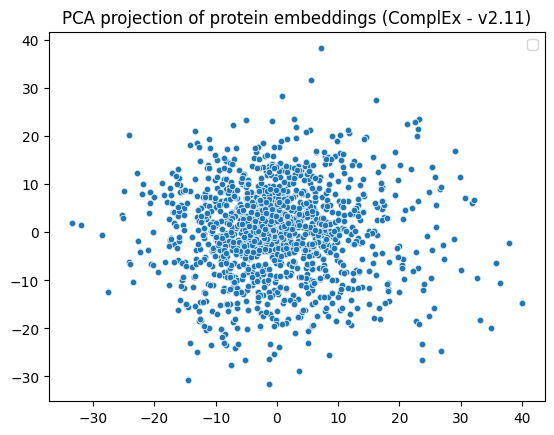

In [41]:
sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1],  s=20)
plt.title(f'PCA projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()

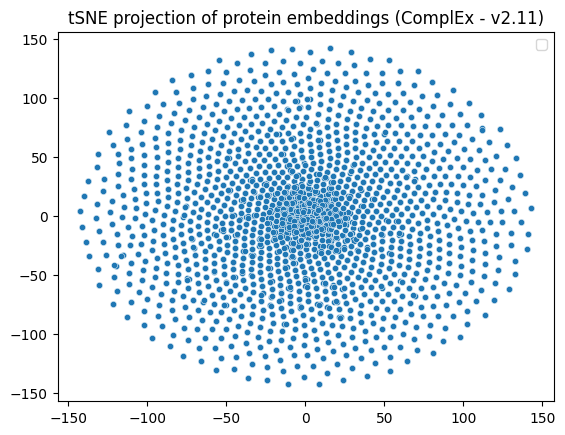

In [42]:
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1],  s=20)
plt.title(f'tSNE projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()

### coloring by embedding weight

In [58]:
# == color by gradient by embedding value
emb=41

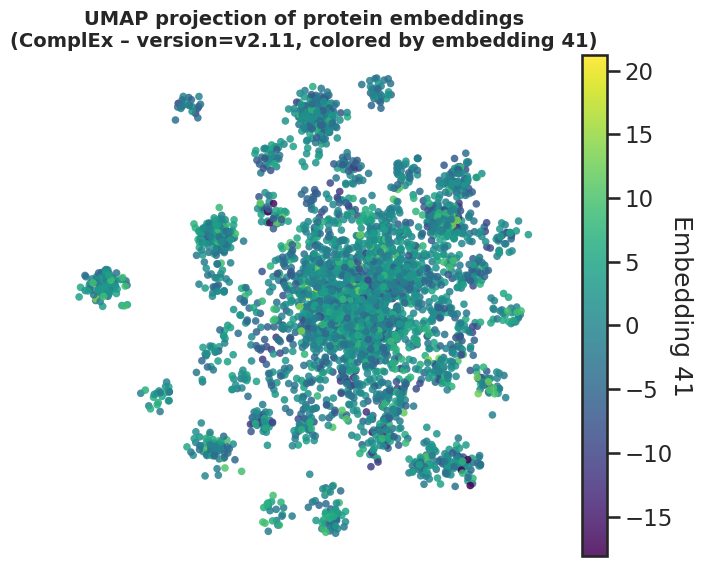

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")

# ---- small jitter (does NOT distort global structure)
jitter = 0.3
x = embedding_umap[:, 0] + np.random.normal(0, jitter, size=embedding_umap.shape[0])
y = embedding_umap[:, 1] + np.random.normal(0, jitter, size=embedding_umap.shape[0])

color_values = df.iloc[:, 5 + emb]

plt.figure(figsize=(7,6))

sc = plt.scatter(
    x,
    y,
    c=color_values,
    cmap="viridis",
    s=30,
    alpha=0.85,
    linewidths=0
)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(
    f"UMAP projection of protein embeddings\n({model} – version={version}, colored by embedding {emb})",
    fontsize=14,
    weight="bold"
)

# ---- tidy axes
# sns.despine()
# plt.tick_params(axis='both', which='major', labelsize=11)

# axis labels (keep labels, remove numbers)
plt.xlabel("UMAP 1", fontsize=13)
plt.ylabel("UMAP 2", fontsize=13)

# remove tick numbers
plt.xticks([])
plt.yticks([])


cbar = plt.colorbar(sc)
cbar.set_label(f"Embedding {emb}", rotation=270, labelpad=15)

plt.axis("off")

plt.tight_layout()
plt.show()


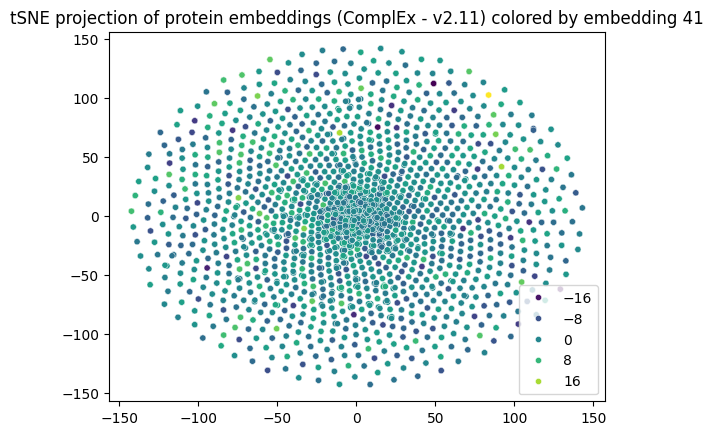

In [60]:
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1], hue=df.iloc[:,5+emb], palette='viridis', s=20)
plt.title(f'tSNE projection of protein embeddings ({model} - {version}) colored by embedding {emb}')
plt.legend()
plt.show()
